Problem Statement : The data is related to direct marketing campaigns of a Portuguese banking institution to predict whether a customer will subscribe to a product or not.

### 1.Import the data from bank.csv file given 

### Data Acquisition

It's time to get access to the actual data and have initial look at the structure of the csv file

### Importing pandas library for data preprocessing

In [34]:
import pandas as pa


### Reading data from bank csv file

In [35]:
ds= pa.read_csv('bank.csv', sep=';' )
print('data Imported from the Source')

data Imported from the Source


### Confirm the Imports

In [36]:
ds.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


Check the Number of rows and colums in the dataset

In [37]:
ds.shape

(4521, 17)

Lets have a quick look at the columns and their respective data types.

In [38]:
ds.columns

Index([u'age', u'job', u'marital', u'education', u'default', u'balance',
       u'housing', u'loan', u'contact', u'day', u'month', u'duration',
       u'campaign', u'pdays', u'previous', u'poutcome', u'y'],
      dtype='object')

In [39]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
age          4521 non-null int64
job          4521 non-null object
marital      4521 non-null object
education    4521 non-null object
default      4521 non-null object
balance      4521 non-null int64
housing      4521 non-null object
loan         4521 non-null object
contact      4521 non-null object
day          4521 non-null int64
month        4521 non-null object
duration     4521 non-null int64
campaign     4521 non-null int64
pdays        4521 non-null int64
previous     4521 non-null int64
poutcome     4521 non-null object
y            4521 non-null object
dtypes: int64(7), object(10)
memory usage: 600.5+ KB


### Data Preparation

### Check for Unique Values in the Dataset

Lets define a fuction that will give us a report about the unique values of data for each attribute.

In [40]:
def show_unique_values(data_frame):
    print("Unique value for dataset attributes :\n")
    for column in data_frame.columns:
        print(column, " " ,data_frame[column].unique(), "\n")   

In [41]:
show_unique_values(ds)

Unique value for dataset attributes :

('age', ' ', array([30, 33, 35, 59, 36, 39, 41, 43, 20, 31, 40, 56, 37, 25, 38, 42, 44,
       26, 55, 67, 53, 68, 32, 49, 78, 23, 52, 34, 61, 45, 48, 57, 54, 63,
       51, 29, 50, 27, 60, 28, 21, 58, 22, 46, 24, 77, 75, 47, 70, 65, 64,
       62, 66, 19, 81, 83, 80, 71, 72, 69, 79, 73, 86, 74, 76, 87, 84],
      dtype=int64), '\n')
('job', ' ', array(['unemployed', 'services', 'management', 'blue-collar',
       'self-employed', 'technician', 'entrepreneur', 'admin.', 'student',
       'housemaid', 'retired', 'unknown'], dtype=object), '\n')
('marital', ' ', array(['married', 'single', 'divorced'], dtype=object), '\n')
('education', ' ', array(['primary', 'secondary', 'tertiary', 'unknown'], dtype=object), '\n')
('default', ' ', array(['no', 'yes'], dtype=object), '\n')
('balance', ' ', array([ 1787,  4789,  1350, ...,  -333, -3313,  1137], dtype=int64), '\n')
('housing', ' ', array(['no', 'yes'], dtype=object), '\n')
('loan', ' ', array(['no', 

<b> As all the columns are numeric in nature Except the class column<b>

### Missing Values imputation (Data Cleansing)


Lets see how the missing values can be replaced in the dataset. First check whereall the missing values are present

Take a closer look at the actual missing value count. 'False' means cell has a value whereas 'True" means cell is missing value. Output the count for different attributes of dataframe.

In [42]:
def show_missing_values(data):
    missing_data = data.isnull()
    for column in missing_data.columns.values.tolist():
        print(column)
        print (missing_data[column].value_counts())
        print("")

In [43]:
show_missing_values(ds)

age
False    4521
Name: age, dtype: int64

job
False    4521
Name: job, dtype: int64

marital
False    4521
Name: marital, dtype: int64

education
False    4521
Name: education, dtype: int64

default
False    4521
Name: default, dtype: int64

balance
False    4521
Name: balance, dtype: int64

housing
False    4521
Name: housing, dtype: int64

loan
False    4521
Name: loan, dtype: int64

contact
False    4521
Name: contact, dtype: int64

day
False    4521
Name: day, dtype: int64

month
False    4521
Name: month, dtype: int64

duration
False    4521
Name: duration, dtype: int64

campaign
False    4521
Name: campaign, dtype: int64

pdays
False    4521
Name: pdays, dtype: int64

previous
False    4521
Name: previous, dtype: int64

poutcome
False    4521
Name: poutcome, dtype: int64

y
False    4521
Name: y, dtype: int64



In [44]:
ds.isnull().values.any()

False

<b> Surprisingly none of the values is missing. So no need to bother about it!<b> 

### Data Correlation

In [45]:
ds.corr()

,age,balance,day,duration,campaign,pdays,previous
age,1.000000,0.083820,-0.017853,-0.002367,-0.005148,-0.008894,-0.003511
balance,0.083820,1.000000,-0.008677,-0.015950,-0.009976,0.009437,0.026196
day,-0.017853,-0.008677,1.000000,-0.024629,0.160706,-0.094352,-0.059114
duration,-0.002367,-0.015950,-0.024629,1.000000,-0.068382,0.010380,0.018080
campaign,-0.005148,-0.009976,0.160706,-0.068382,1.000000,-0.093137,-0.067833
pdays,-0.008894,0.009437,-0.094352,0.010380,-0.093137,1.000000,0.577562
previous,-0.003511,0.026196,-0.059114,0.018080,-0.067833,0.577562,1.000000


there are no coloums that are highly correlated

### 2.Consider all columns as independent variables and assign to variable X except the last column and consider the last column as dependent variable and assign to          variable y. Remove columns which don’t help the problem statement

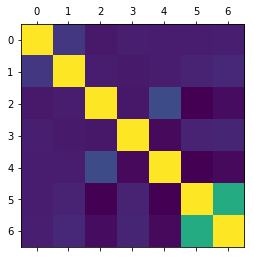

,age,balance,day,duration,campaign,pdays,previous
age,1.000000,0.083820,-0.017853,-0.002367,-0.005148,-0.008894,-0.003511
balance,0.083820,1.000000,-0.008677,-0.015950,-0.009976,0.009437,0.026196
day,-0.017853,-0.008677,1.000000,-0.024629,0.160706,-0.094352,-0.059114
duration,-0.002367,-0.015950,-0.024629,1.000000,-0.068382,0.010380,0.018080
campaign,-0.005148,-0.009976,0.160706,-0.068382,1.000000,-0.093137,-0.067833
pdays,-0.008894,0.009437,-0.094352,0.010380,-0.093137,1.000000,0.577562
previous,-0.003511,0.026196,-0.059114,0.018080,-0.067833,0.577562,1.000000


In [46]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.matshow(ds.corr())
plt.show()
ds.corr()

In [47]:
X = ds[['age','balance','day','duration','campaign','pdays','previous']]
Y = ds['y']

### 3.Compute some basic statistical details like percentile, mean, standard deviation of dataset.

In [48]:
X.describe()

,age,balance,day,duration,campaign,pdays,previous
count,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000
mean,41.170095,1422.657819,15.915284,263.961292,2.793630,39.766645,0.542579
std,10.576211,3009.638142,8.247667,259.856633,3.109807,100.121124,1.693562
min,19.000000,-3313.000000,1.000000,4.000000,1.000000,-1.000000,0.000000
25%,33.000000,69.000000,9.000000,104.000000,1.000000,-1.000000,0.000000
50%,39.000000,444.000000,16.000000,185.000000,2.000000,-1.000000,0.000000
75%,49.000000,1480.000000,21.000000,329.000000,3.000000,-1.000000,0.000000
max,87.000000,71188.000000,31.000000,3025.000000,50.000000,871.000000,25.000000


In [49]:
Y.describe()

count     4521
unique       2
top         no
freq      4000
Name: y, dtype: object

### 4.Encode all the categorical columns into numeric.

In [50]:
Y = pa.Categorical(Y)
Y.codes

array([0, 0, 0, ..., 0, 0, 0], dtype=int8)

### 5.Do Feature Scaling on Independent variables.

In [51]:
X

,age,balance,day,duration,campaign,pdays,previous
0,30,1787,19,79,1,-1,0
1,33,4789,11,220,1,339,4
2,35,1350,16,185,1,330,1
3,30,1476,3,199,4,-1,0
4,59,0,5,226,1,-1,0
5,35,747,23,141,2,176,3
6,36,307,14,341,1,330,2
7,39,147,6,151,2,-1,0
8,41,221,14,57,2,-1,0
9,43,-88,17,313,1,147,2


In [52]:
Y

[no, no, no, no, no, ..., no, no, no, no, no]
Length: 4521
Categories (2, object): [no, yes]

### 6.Split the data into train and test dataset.

Differentiating Testing and Training Data taking a test size of 20% and assiging to variables
We had taken 80-20 % for differetiating train and test data for deriving a better model

In [53]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y.codes, test_size=0.20, random_state=0)

In [54]:
X_train, X_test, Y_train, Y_test

(      age  balance  day  duration  campaign  pdays  previous
 4383   26      609   28       112         1     -1         0
 502    31       13   28       110         5     -1         0
 4052   52       20   28       172         1     -1         0
 3634   54      153   26        74         1     -1         0
 3088   31     2544   15       252         1    184         3
 2802   34      516    2        26         1     -1         0
 2854   31       35   16       229         1     -1         0
 1474   44      432    9       132         3     -1         0
 527    49       66    9       218         3     -1         0
 4210   51       78   27       723         2     -1         0
 206    42     2030    9       196         1     -1         0
 1185   33       -6    7       566         2     -1         0
 2509   41        0   30       232         3     -1         0
 1362   47     2597   16       323         1     -1         0
 2024   42      216    8       144         3     -1         0
 3341   

 ### 7.Use sklearn library to train on train dataset on  logistic regressionand predict on test dataset.

import LogisticRegression from sklean library

In [55]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(X_train, Y_train)
Y_predict = classifier.predict(X_test)
Y_predict

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,

### 8.Compute the accuracy and confusion matrix. 

In [56]:
from sklearn.metrics import accuracy_score, precision_score , confusion_matrix
accuracy = accuracy_score(Y_test, Y_predict, normalize=True)
confusion_matrix(Y_test, Y_predict)

array([[774,  19],
       [ 86,  26]], dtype=int64)

Compute accuracy and print

In [57]:
print(accuracy)

0.8839779005524862
